In [20]:
# 📦 Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
# 📥 Carregar dataset (ajuste o caminho se necessário)
df = pd.read_csv("dataset_enchentes_sp_simulado_balanceado.csv")

# Remover espaços no início/fim dos nomes das colunas
df.columns = df.columns.str.strip().str.replace(" ", "_")

# 👀 Visualizar as primeiras linhas
df.head()


,data,bairro,chuva_6h,chuva_24h,previsao_chuva_6h,nivel_rio,umidade_solo,alagamento
0,2025-05-01,Ipiranga,14.0,27.6,13.9,1.88,82.8,0
1,2025-05-01,Pirituba,8.1,38.9,14.6,2.77,53.0,1
2,2025-05-01,Santana,6.3,16.6,11.5,1.14,31.3,1
3,2025-05-01,Itaim Paulista,5.5,10.4,11.9,1.79,46.4,1
4,2025-05-01,Jardim Pantanal,21.7,34.4,10.4,2.73,38.6,0


In [22]:
# ℹ️ Estrutura do DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   data               150 non-null    object 
 1   bairro             150 non-null    object 
 2   chuva_6h           150 non-null    float64
 3   chuva_24h          150 non-null    float64
 4   previsao_chuva_6h  150 non-null    float64
 5   nivel_rio          150 non-null    float64
 6   umidade_solo       150 non-null    float64
 7   alagamento         150 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 9.5+ KB


In [23]:
# ❓ Verificando valores ausentes
print("Valores nulos por coluna:")
print(df.isnull().sum())

# 🔁 Checando duplicatas
print("\nNúmero de linhas duplicadas:", df.duplicated().sum())


Valores nulos por coluna:
data                 0
bairro               0
chuva_6h             0
chuva_24h            0
previsao_chuva_6h    0
nivel_rio            0
umidade_solo         0
alagamento           0
dtype: int64

Número de linhas duplicadas: 0


In [24]:
# 📊 Estatísticas básicas
df.describe(include="all")


,data,bairro,chuva_6h,chuva_24h,previsao_chuva_6h,nivel_rio,umidade_solo,alagamento
count,150,150,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
unique,30,5,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-05-01,Ipiranga,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,30,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.902667,25.102667,9.646667,2.404267,60.733333,0.153333
std,NaN,NaN,6.620387,10.748741,5.343071,0.643886,14.682001,0.361516
min,NaN,NaN,0.000000,0.000000,0.000000,1.010000,30.000000,0.000000
25%,NaN,NaN,4.350000,17.325000,5.825000,1.925000,51.175000,0.000000
50%,NaN,NaN,10.200000,24.100000,9.600000,2.395000,61.500000,0.000000
75%,NaN,NaN,14.275000,32.450000,13.075000,2.822500,69.350000,0.000000


alagamento
0    84.666667
1    15.333333
Name: proportion, dtype: float64


C:\Users\cayog\AppData\Local\Temp\ipykernel_20620\2786426290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="alagamento", palette="Reds")


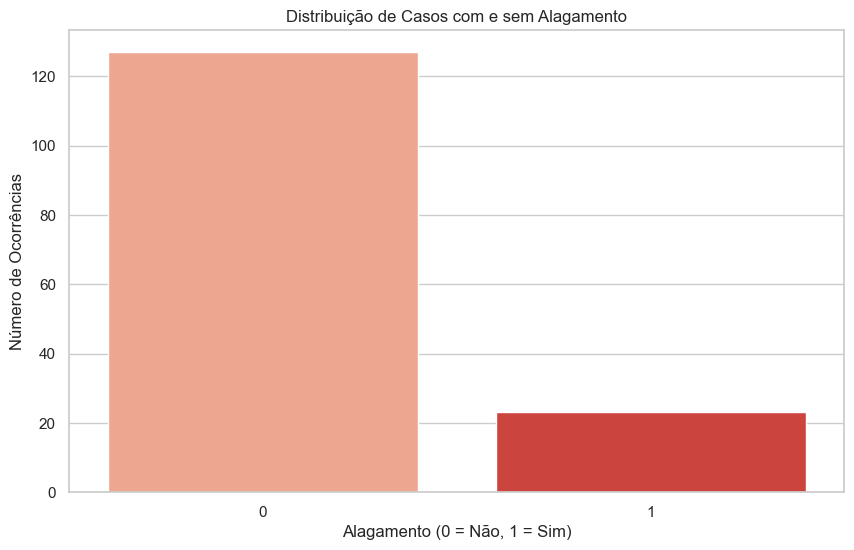

In [ ]:
# 📈 Distribuição em porcentagem
print(df["alagamento"].value_counts(normalize=True) * 100)

# 📊 Gráfico da distribuição
sns.countplot(data=df, x="alagamento", palette="Reds")
plt.title("Distribuição de Casos com e sem Alagamento")
plt.xlabel("Alagamento (0 = Não, 1 = Sim)")
plt.ylabel("Número de Ocorrências")
plt.show()


C:\Users\cayog\AppData\Local\Temp\ipykernel_20620\4294048008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_bairros.values, y=df_bairros.index, palette="Reds_r")


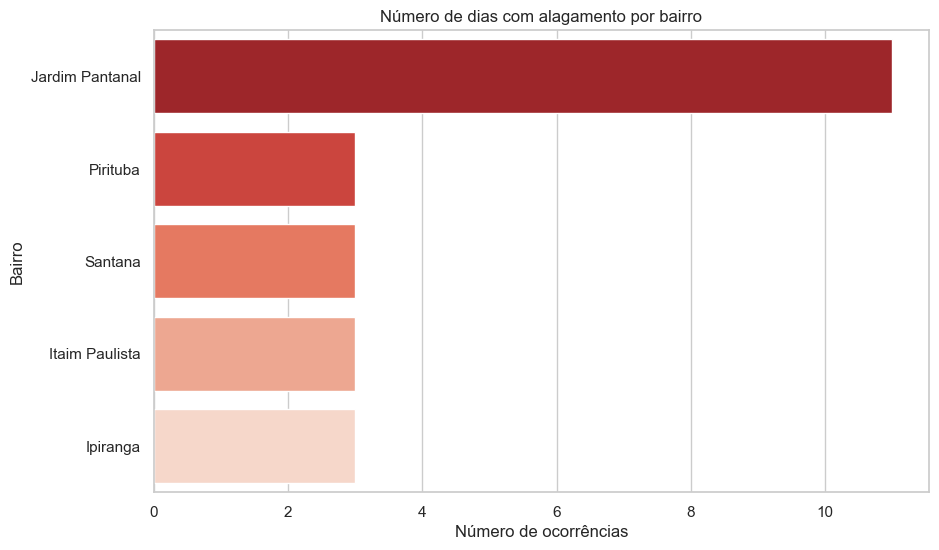

In [ ]:
# 📊 Total de alagamentos por bairro
df_bairros = df[df["alagamento"] == 1]["bairro"].value_counts()

sns.barplot(x=df_bairros.values, y=df_bairros.index, palette="Reds_r")
plt.title("Número de dias com alagamento por bairro")
plt.xlabel("Número de ocorrências")
plt.ylabel("Bairro")
plt.show()


C:\Users\cayog\AppData\Local\Temp\ipykernel_20620\2154779531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alagamento", y=var, palette="Blues")


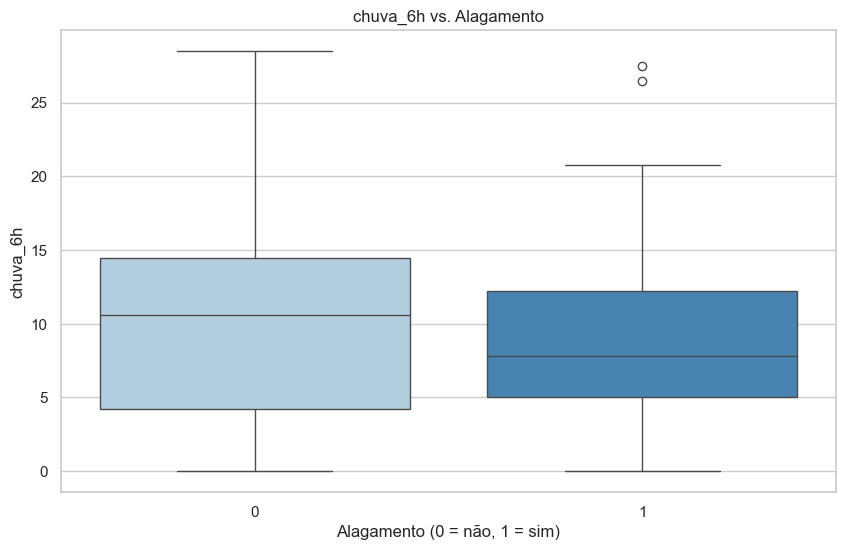

C:\Users\cayog\AppData\Local\Temp\ipykernel_20620\2154779531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alagamento", y=var, palette="Blues")


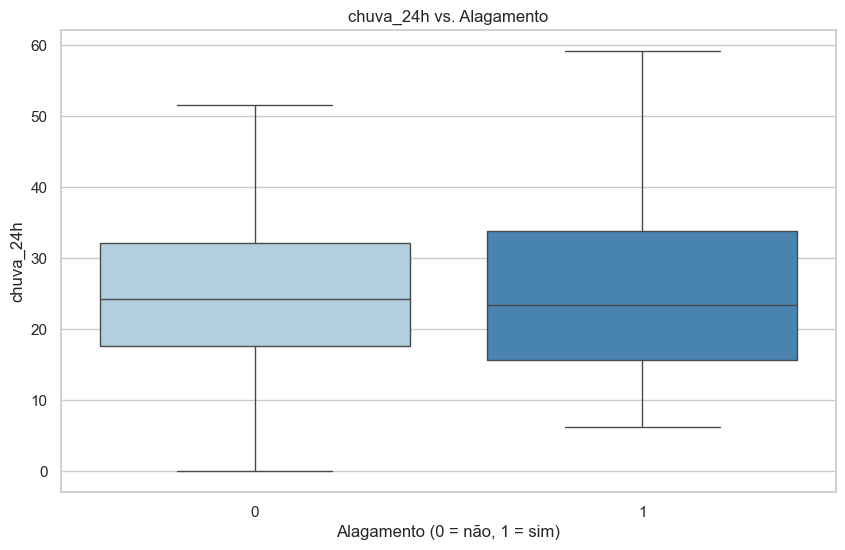

C:\Users\cayog\AppData\Local\Temp\ipykernel_20620\2154779531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alagamento", y=var, palette="Blues")


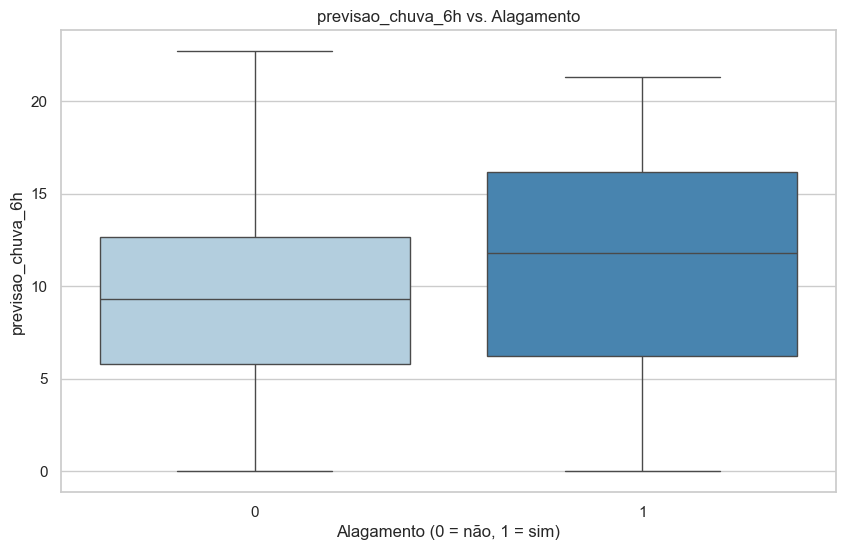

C:\Users\cayog\AppData\Local\Temp\ipykernel_20620\2154779531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alagamento", y=var, palette="Blues")


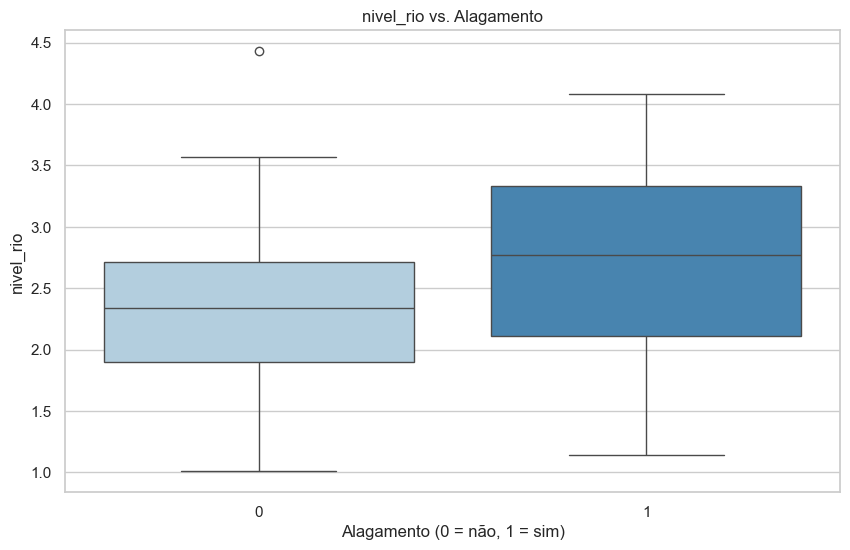

C:\Users\cayog\AppData\Local\Temp\ipykernel_20620\2154779531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="alagamento", y=var, palette="Blues")


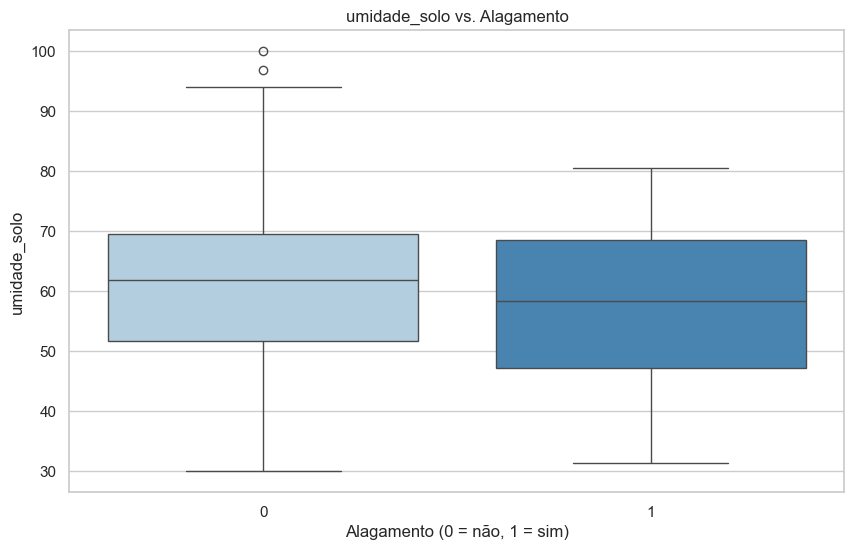

In [27]:
# 🔎 Boxplot para comparar variáveis com ocorrência de alagamento
variaveis = ["chuva_6h", "chuva_24h", "previsao_chuva_6h", "nivel_rio", "umidade_solo"]

for var in variaveis:
    sns.boxplot(data=df, x="alagamento", y=var, palette="Blues")
    plt.title(f"{var} vs. Alagamento")
    plt.xlabel("Alagamento (0 = não, 1 = sim)")
    plt.ylabel(var)
    plt.show()


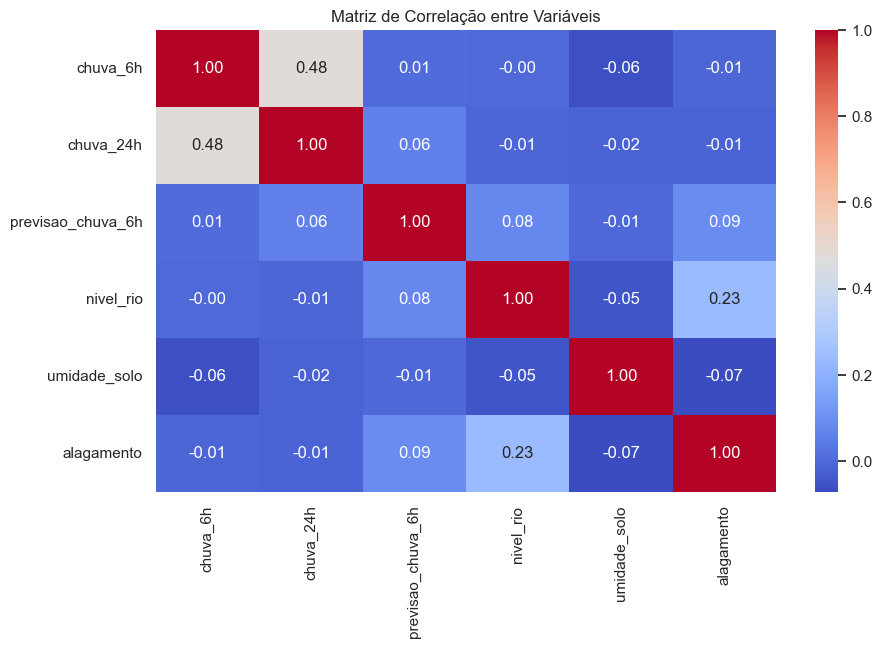

In [28]:
# 📈 Correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=["data", "bairro"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()


In [29]:
# 🎯 Separar target
y = df["alagamento"]

# 🔁 Incluir 'bairro' como variável preditora usando one-hot encoding
X = df.drop(columns=["data", "alagamento"])
X = pd.get_dummies(X, columns=["bairro"], drop_first=True)  # evita multicolinearidade

# 🔍 Visualizar as novas colunas
print("Novas colunas após codificação de 'bairro':")
print(X.columns)


Novas colunas após codificação de 'bairro':
Index(['chuva_6h', 'chuva_24h', 'previsao_chuva_6h', 'nivel_rio',
       'umidade_solo', 'bairro_Itaim Paulista', 'bairro_Jardim Pantanal',
       'bairro_Pirituba', 'bairro_Santana'],
      dtype='object')


In [30]:
from sklearn.model_selection import train_test_split

# 🔀 Separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Dimensões do conjunto de treino:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)


Dimensões do conjunto de treino: (120, 9)
Dimensões do conjunto de teste: (30, 9)


In [31]:
from sklearn.ensemble import RandomForestClassifier

# 🌳 Modelo Random Forest com peso ajustado
modelo = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

modelo.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

📈 Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.20      0.33         5

    accuracy                           0.87        30
   macro avg       0.93      0.60      0.63        30
weighted avg       0.89      0.87      0.83        30



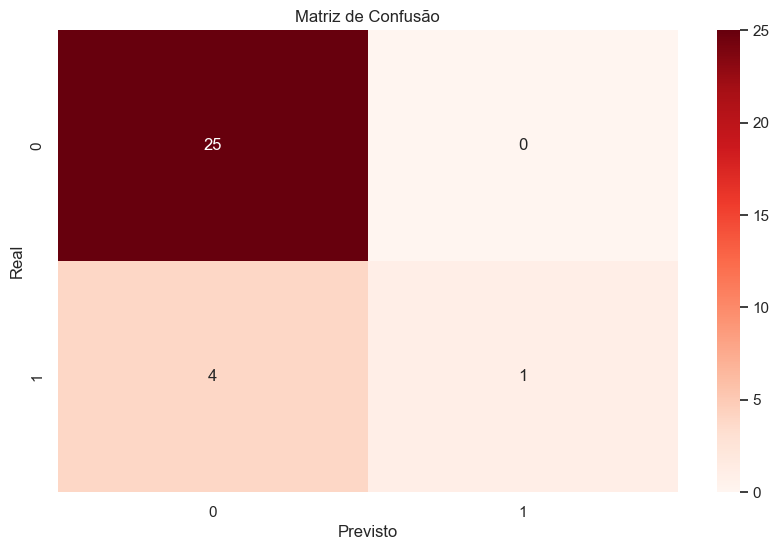

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 Avaliação
y_pred = modelo.predict(X_test)

print("📈 Classification Report:")
print(classification_report(y_test, y_pred))

# 🔄 Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


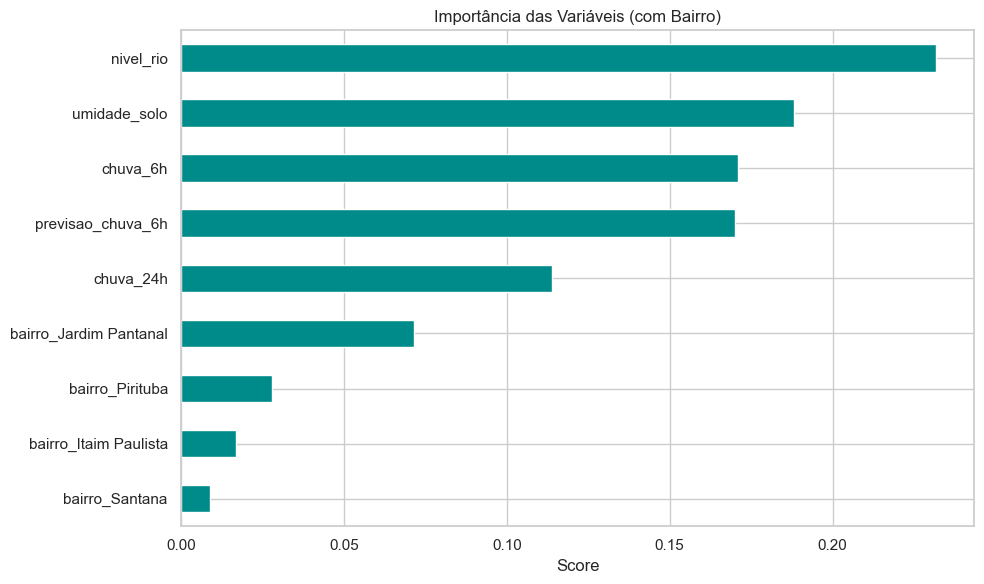

In [33]:
# 📌 Importância das variáveis com bairro incluído
importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values()

importancias.plot(kind="barh", color="darkcyan")
plt.title("Importância das Variáveis (com Bairro)")
plt.xlabel("Score")
plt.tight_layout()
plt.show()
